<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.preprocessing import LabelEncoder

#### Read the data

Load the csv file and set the first column as index

In [3]:
# type your code here
df=pd.read_csv('car_price.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [95]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [13]:
#df[df.duplicated()]
#df=df.drop_duplicates().reset_index()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [4]:
df_cat=df.select_dtypes(include=np.object)
df_num=df.select_dtypes(include=[np.int64,np.float])

In [26]:
df_num.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [22]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat['Car_Name']=le.fit_transform(df_cat['Car_Name'])

<ipython-input-5-557f04bf2cb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Car_Name']=le.fit_transform(df_cat['Car_Name'])


In [30]:
df_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,Petrol,Dealer,Manual
1,93,Diesel,Dealer,Manual
2,68,Petrol,Dealer,Manual
3,96,Petrol,Dealer,Manual
4,92,Diesel,Dealer,Manual


In [6]:
cat_dummy = pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']], drop_first=True)

In [7]:
X=pd.concat([df_cat['Car_Name'],cat_dummy],axis=1)

In [41]:
X.head()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,90,0,1,0,1
1,93,1,0,0,1
2,68,0,1,0,1
3,96,0,1,0,1
4,92,1,0,0,1


In [8]:
x=pd.concat([X,df_num],axis=1)

In [43]:
x.head()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,90,0,1,0,1,2014,3.35,5.59,27000,0
1,93,1,0,0,1,2013,4.75,9.54,43000,0
2,68,0,1,0,1,2017,7.25,9.85,6900,0
3,96,0,1,0,1,2011,2.85,4.15,5200,0
4,92,1,0,0,1,2014,4.60,6.87,42450,0


In [50]:
x.describe()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,0.199336,0.794020,0.352159,0.867110,7.372093,4.661296,7.628472,36947.205980,0.043189
std,25.573535,0.400166,0.405089,0.478439,0.340021,2.891554,5.082812,8.644115,38886.883882,0.247915
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.100000,0.320000,500.000000,0.000000
25%,47.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.900000,1.200000,15000.000000,0.000000
50%,69.000000,0.000000,1.000000,0.000000,1.000000,7.000000,3.600000,6.400000,32000.000000,0.000000
75%,82.000000,0.000000,1.000000,1.000000,1.000000,9.000000,6.000000,9.900000,48767.000000,0.000000
max,97.000000,1.000000,1.000000,1.000000,1.000000,18.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
x['Kms_Driven']=np.sqrt(x['Kms_Driven'])

In [10]:
x['Year']=2021-x['Year']

In [11]:
x['Kms_Driven'].skew()

1.3126718548762728

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


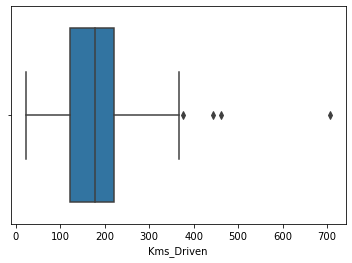

In [68]:
sns.boxplot(x['Kms_Driven'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


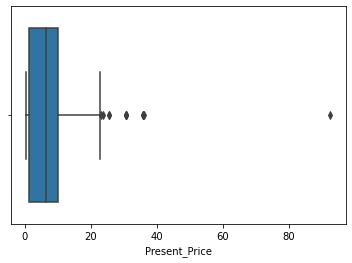

In [69]:
sns.boxplot(x['Present_Price'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


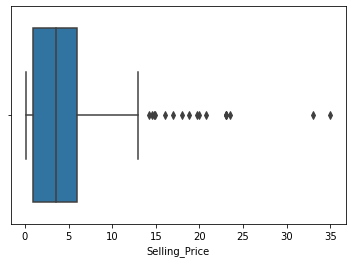

In [70]:
sns.boxplot(x['Selling_Price'])
plt.show()

In [71]:
x.shape

(301, 10)

In [12]:
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1
print(IQR)
x = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
x.shape

Car_Name                  35.000000
Fuel_Type_Diesel           0.000000
Fuel_Type_Petrol           0.000000
Seller_Type_Individual     1.000000
Transmission_Manual        0.000000
Year                       4.000000
Selling_Price              5.100000
Present_Price              8.700000
Kms_Driven                98.358029
Owner                      0.000000
dtype: float64


(194, 10)

In [78]:
x.head()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,90,0,1,0,1,7,3.35,5.59,164.316767,0
2,68,0,1,0,1,4,7.25,9.85,83.066239,0
3,96,0,1,0,1,10,2.85,4.15,72.111026,0
6,68,0,1,0,1,6,6.75,8.12,137.098505,0
10,62,0,1,0,1,4,2.85,3.60,46.206060,0


In [94]:
x['Owner'].value_counts()

0    187
Name: Owner, dtype: int64

In [13]:
X=x.drop('Selling_Price',axis=1)

In [29]:
y=x['Selling_Price']

Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [15]:
x_sm=sm.add_constant(x)

In [16]:
# type your code here
MLR_model = sm.OLS(y,x_sm).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.021e+28
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:29:01   Log-Likelihood:                 5630.5
No. Observations:                 194   AIC:                        -1.125e+04
Df Residuals:                     187   BIC:                        -1.122e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Car_Name                2.02

C:\Users\AS20188795\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [108]:
X.shape

(187, 9)

In [109]:
y.shape

(187,)

In [110]:
y

0      3.35
2      7.25
3      2.85
6      6.75
10     2.85
       ... 
293    3.25
294    3.75
297    4.00
298    3.35
300    5.30
Name: Selling_Price, Length: 187, dtype: float64

In [112]:
X_test.head()

31     2.35
280    5.25
216    2.90
107    1.25
180    0.30
Name: Selling_Price, dtype: float64

In [22]:
X1=x.drop('Owner',axis=1)

In [31]:
logreg=LinearRegression()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state = 1, test_size = 0.3)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#mse_test = round(mean_squared_error(y_test, y_pred),4)
# printing the mse for the test set
#print("Mean Squared Error (MSE): ", mse_test)
# taking the square root of the mse and then rounding the value upto 4 digits
#rmse_test = round(np.sqrt(mse_test), 4)
# printing the rmse for the test set
#print("Root Mean Squared Error (RMSE): ", rmse_test)

In [40]:
logreg.score(X_train,y_train)

1.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

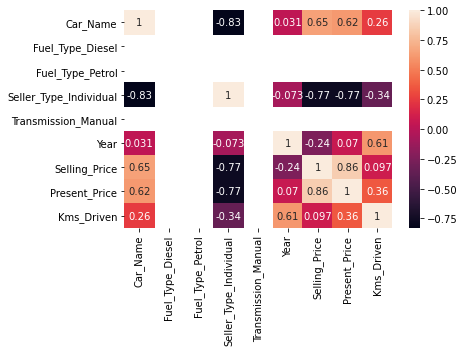

In [41]:
# type your code here
sns.heatmap(X1.corr(),annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


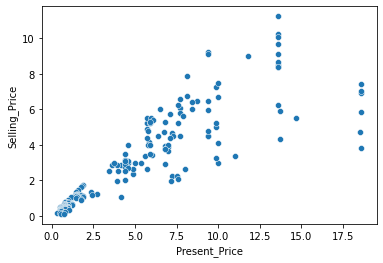

In [43]:
# type your code here
#Selling price and Present price has high corelation
sns.scatterplot(X1['Present_Price'],X1['Selling_Price'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [47]:
x=df.select_dtypes(include=['int64','float'])
x.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [48]:
# type your code here

y=df['Selling_Price']
MLR_model = sm.OLS(y,x).fit()

In [49]:
print(MLR_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.782e+24
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                        06:59:14   Log-Likelihood:                          7021.7
No. Observations:                 301   AIC:                                 -1.403e+04
Df Residuals:                     296   BIC:                                 -1.401e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


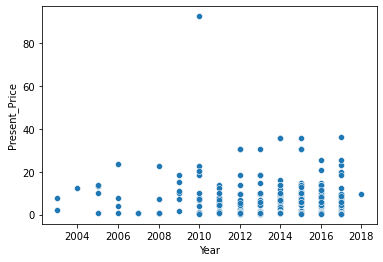

In [54]:
# type your code here
sns.scatterplot(x['Year'],x['Present_Price'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


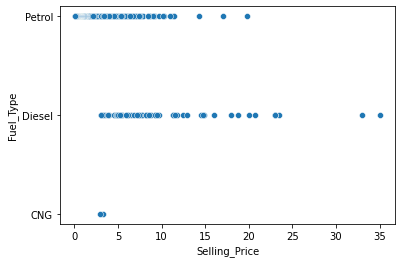

In [55]:
# type your code here
sns.scatterplot(df['Selling_Price'],df['Fuel_Type'])
plt.show()

In [ ]:
#Diesel type has more impact on selling price

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [56]:
# type your code here
x=X1['Selling_Price']
y=X1['Transmission_Manual']

In [57]:
q7=sm.OLS(x,y).fit()

In [58]:
q7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                nan
Time:                        07:09:43   Log-Likelihood:                -463.83
No. Observations:                 194   AIC:                             929.7
Df Residuals:                     193   BIC:                             932.9
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Transmission_Manual     3.0653      0.190     16.112      0.000       2.690       3.440
==============================================================================
Omnibus:                       19.902   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.893
Skew:                           0.859   Prob(JB):                     6.48e-06
Kurtosis:                       2.920   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [33]:
# type your code here


In [14]:
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [35]:
x=df.drop(df[['Selling_Price','Car_Name']],axis=1)

In [19]:
y=df['Selling_Price']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [37]:
lR=LinearRegression()
lR.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=lR.predict(x_test)

In [39]:
print(np.sqrt(mean_absolute_error(y_pred,y_test))) # 1.2108460877017566

1.210538010234794


In [40]:
metrics.r2_score(y_pred,y_test) #0.7379970513787328

0.7391000003138761

In [47]:
print(lR.n_features_in_)

7
